#Importing Libraries

In [1]:
!pip install mlxtend --upgrade --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.datasets as datasets
from sklearn.model_selection import train_test_split as tts
import torchvision.transforms as transforms
from torch.utils.data import random_split
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import  train_test_split as tts
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from mlxtend.plotting import plot_decision_regions

#Problem 1


In [3]:
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt",sep=",",names=['variance','skewness','curtosis','entropy','class'])
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [5]:
X=df.drop('class',axis=1).to_numpy()
y=df['class'].to_numpy()
std_enc=StandardScaler()
X=std_enc.fit_transform(X)

pd.DataFrame(X,columns=df.columns[:-1])


,variance,skewness,curtosis,entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587
...,...,...,...,...
1367,-0.009711,-0.097693,-0.660962,0.300996
1368,-0.641313,-1.158984,1.179023,0.730127
1369,-1.472357,-2.621646,3.759017,-0.754884
1370,-1.406693,-1.756471,2.552043,-0.043158


<Axes: >

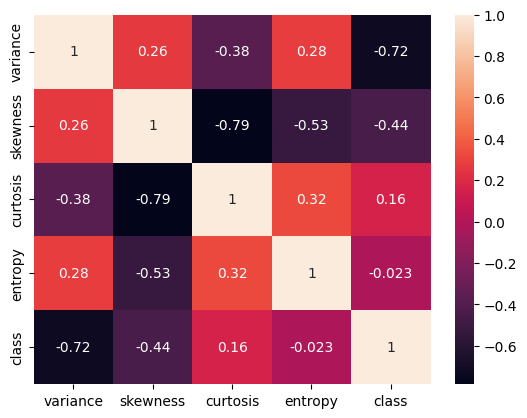

In [21]:
sns.heatmap(df.corr(),annot=True)

In [7]:
X_train,X_temp,y_train,y_temp=tts(X,y,train_size=0.7)
X_test,X_valid,y_test,y_valid=tts(X_temp,y_temp,train_size=2/3)
print(X_train.shape,X_valid.shape,X_test.shape)

(960, 4) (138, 4) (274, 4)


In [22]:
def plot_decision_boundary(clf,X,Y):
        # print(n)
        # new_clf_RFC=  BaggingClassifier(base_estimator=SVC(),n_estimators=n ).fit(X_train,Y_train)
        # print(new_clf_RFC.score(X_test,Y_test))
        

        classes=np.unique(Y)
        n_classes = len(classes)
        plot_colors = "rb"
        plot_step = 0.04
        # clf.fit(X,Y)


        # X=self.transform(X)
            
            

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                            np.arange(y_min, y_max, plot_step))
        plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

        plt.xlabel("X1")
        plt.ylabel("X2")

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(Y == classes[i])
            plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i,
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=16)


        plt.legend(loc='lower right', borderpad=0, handletextpad=0)
        plt.axis("tight")


        plt.show()

C:  5


<ipython-input-22-32ea0db07cc0>:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i,


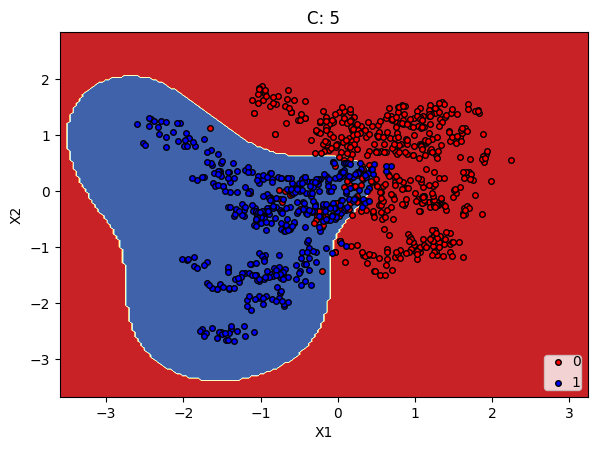

0.9202898550724637
C:  10


<ipython-input-22-32ea0db07cc0>:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i,


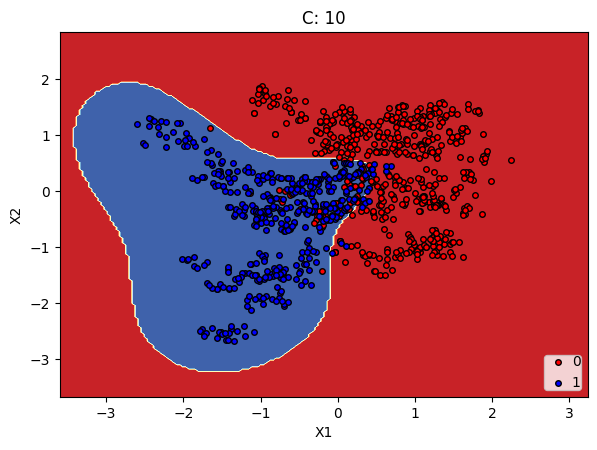

0.9130434782608695
C:  20


<ipython-input-22-32ea0db07cc0>:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i,


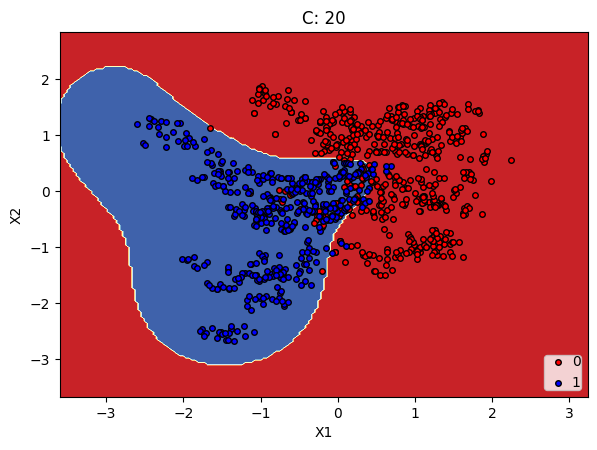

0.9202898550724637
C:  40


<ipython-input-22-32ea0db07cc0>:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i,


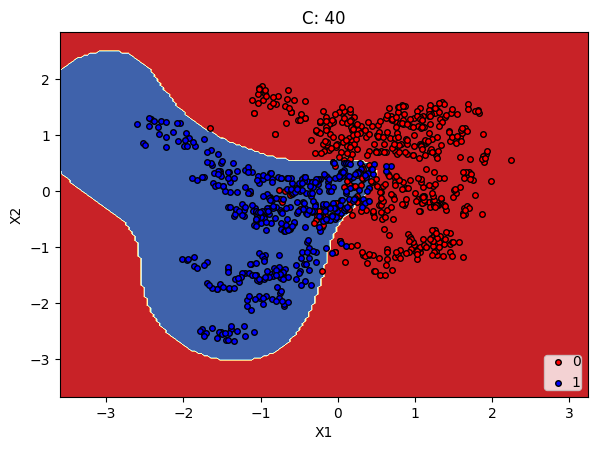

0.9202898550724637
C:  100


<ipython-input-22-32ea0db07cc0>:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i,


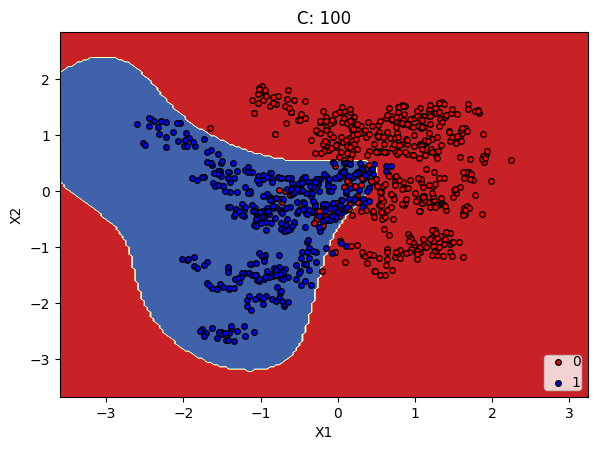

0.9202898550724637


In [23]:

for c in [5,10,20,40,100]:
    print('C: ',c)
    clf=SVC(C=c)
    # clf.fit(X_train,y_train)
    X_red=X_train[:,[0,1]]

    clf.fit(X_red,y_train)
    plt.title('C: '+ str(c))
    plot_decision_boundary(clf,X_train[:,[0,1]],y_train)
    # plot_decision_regions(X_train,y_train,clf,feature_index=[1,2],filler_feature_values={0: value, 3:value},filler_feature_ranges={0: width, 3: width})
    plt.show()
    print(clf.score(X_valid[:,[0,1]],y_valid))


Kernel:  linear


<ipython-input-22-32ea0db07cc0>:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i,


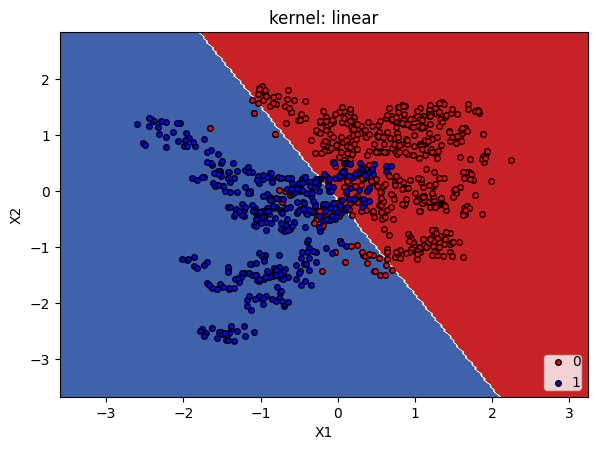

0.8478260869565217
Kernel:  poly


<ipython-input-22-32ea0db07cc0>:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i,


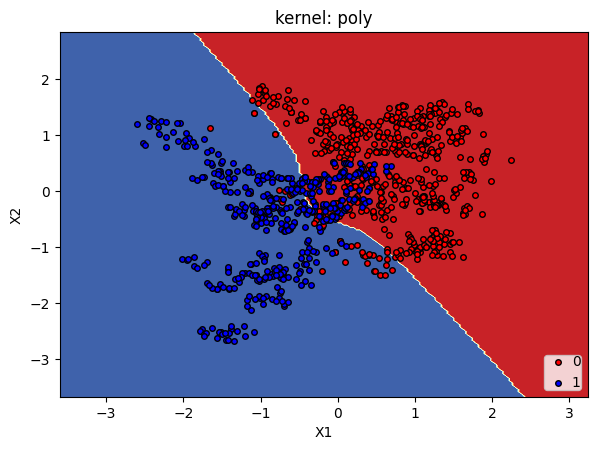

0.8043478260869565
Kernel:  rbf


<ipython-input-22-32ea0db07cc0>:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i,


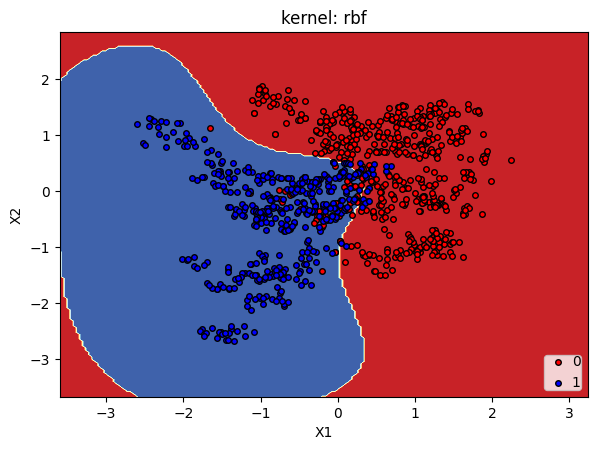

0.9057971014492754
Kernel:  sigmoid


<ipython-input-22-32ea0db07cc0>:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i,


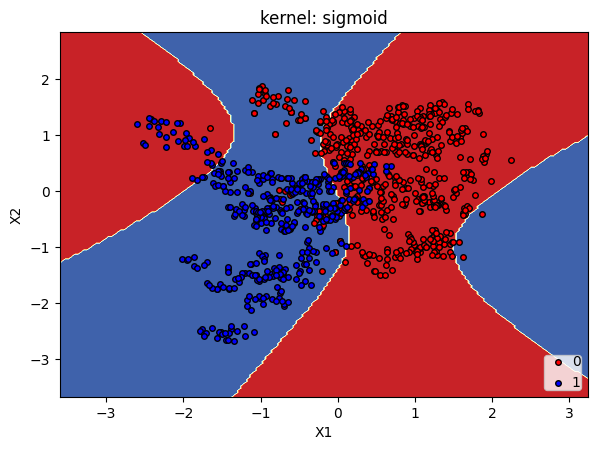

0.7971014492753623


In [24]:
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    print('Kernel: ',kernel)
    clf=SVC(kernel=kernel)
    # clf.fit(X_train,y_train)
    X_red=X_train[:,[0,1]]

    clf.fit(X_red,y_train)
    plt.title('kernel: '+ kernel)
    plot_decision_boundary(clf,X_train[:,[0,1]],y_train)
    # plot_decision_regions(X_train,y_train,clf,feature_index=[1,2],filler_feature_values={0: value, 3:value},filler_feature_ranges={0: width, 3: width})
    plt.show()
    print(clf.score(X_valid[:,[0,1]],y_valid))